<a href="https://colab.research.google.com/github/emsiefert/NeuroCoreCourse/blob/main/Parametric_Correlation_Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'Tail Length')

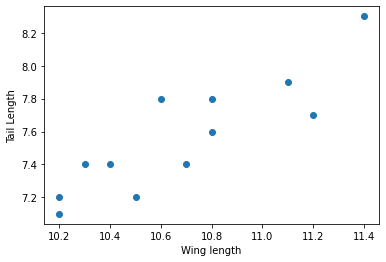

In [2]:
from matplotlib import pyplot as plt
import numpy as np
#worked on this while hanging with emily

# two measured variables:

wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

#1. 
plt.scatter(wing_length, tail_length)
plt.xlabel("Wing length")
plt.ylabel("Tail Length")

#yeah, these look like they could have some kind of relationship


In [6]:
#2. calculate r_xy and r_yx using the equations above and then using function corrcoef
#taking the sum from i-1 to n of x-x_mean * y-ymean, dividing that by the square root... htis is. alot, just gonna do the function for now
xdiff = wing_length - np.mean(wing_length)
ydiff = tail_length - np.mean(tail_length)

r_xy = np.dot(xdiff, ydiff)/(np.sqrt(sum(xdiff**2))*np.sqrt(sum(ydiff**2)))
print(r_xy) # r_xy is the same of r_yx, these values in this situaiton are the same!

pearsons = np.corrcoef(wing_length, tail_length)
print(pearsons) # this is printing both r_xy and r_yx for us, they are the same



0.8703545613058227
[[1.         0.87035456]
 [0.87035456 1.        ]]


In [27]:

#3. standard error of r_xy
n = len(wing_length)
s_r = np.sqrt((1-r_xy**2)/(n-2))

print(s_r)

# 95% confidence intervals computed from the standard error

#. take fishers z
z = .5*np.log((1+r_xy)/(1-r_xy))
s = np.sqrt(1/(n-3))
print(z, s)

#confidence interval:
z_criterion = 1.96

conf_int = [z-(z_criterion*s), z+(z_criterion*s)]
print(conf_int)

new_r = ((np.exp(2*conf_int[0])-1)/(np.exp(2*conf_int[0])+1))
new_r2 = ((np.exp(2*conf_int[1])-1)/(np.exp(2*conf_int[1])+1))
print(new_r, new_r2)

#4. 

t_stat = r_xy/s_r
print(t_stat)

# this is a very big t_stat, i reject the null!

#5. now, r=.75 H_0
yale_r = .75
yale_z = .5*np.log((1+yale_r)/(1-yale_r))

lamb = (z - yale_z)/np.sqrt(1/(n-3))
print(lamb)
# this lies in our conf interval so we cant reject that they are different

#6.
s_r2 = np.sqrt((1-.5**2)/(n-2))
t_stat2 = .5/s_r2
print(t_stat2)

# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.5
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

# this doesnt seem right ^, but i think i would calculate n for max interval value?

0.15571863652567375
1.334539983587134 0.3333333333333333
[0.6812066502538008, 1.9878733169204674]
0.5923032846726551 0.9631607285142775
5.589276792584329
1.0847547271784326
1.8257418583505538
Sample Size: 21.743
12
